In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2

m = 6
k = 4
S = np.sqrt(2)**np.arange(m)
B = create_module_basis(m, k, S)

A = create_action_tensor(B)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


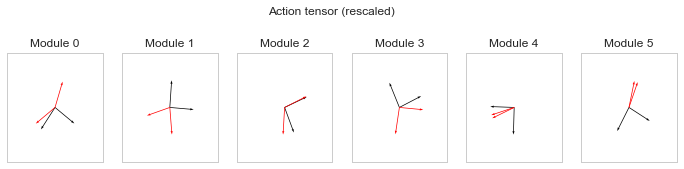

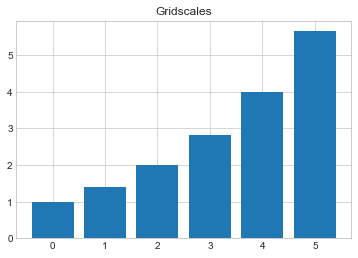

In [34]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Action tensor (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = A[i,0,:] * S[i]
    r2 = A[i,1,:] * S[i]

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(2,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="red")

plt.show()



fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.bar(range(m), S)

plt.show()

In [35]:

r = 1.
bins_per_axis = 10
den = bins_per_axis**k
n   = int(ball_volume(k,r) * den)


summary = \
"Bins per (domain) axis : {}".format(bins_per_axis) + \
"\nSamples per (domain) volume: {}".format(den) + \
"\nVolume of the {}-dimensional ball of radius {}: {}".format(k, r, ball_volume(k,r)) + \
"\nNumber of samples in ball: {}".format(n) 

print summary



Bins per (domain) axis : 10
Samples per (domain) volume: 10000
Volume of the 4-dimensional ball of radius 1.0: 4.93480220054
Number of samples in ball: 49348


In [36]:


"""
First sample is the zero vector
"""
X_ = np.zeros((1,k))


"""
First uniformly sample 
from $k$-dim ball of radius r
"""

D   = np.random.multivariate_normal(mean=np.zeros(k),cov=np.eye(k), size=n) 
D   = D/ np.sqrt(np.sum(D**2, axis=1, keepdims=True))
U   = np.random.uniform(size=(n,1))
X_r = r*D*(U**(1./k))
X_ = np.concatenate([X_, X_r], axis=0)


"""
Add additional samples for fixed
radii, including zero
"""

radii   = np.linspace(0.,r, num=100)
n_per_r = 10

for r in radii:
    D = np.random.multivariate_normal(mean=np.zeros(k),cov=np.eye(k), size=n_per_r) 
    D = D/np.sqrt(np.sum(D**2, axis=1, keepdims=True))
    X_ = np.concatenate([X_, r*D], axis=0)
    



X = np.zeros(X_.shape)
    

Q  = map_to_hypertorus(B, X )
Q_ = map_to_hypertorus(B, X_)    
   
print Q.shape, Q_.shape
print np.min(Q), np.max(Q)
print np.min(Q_), np.max(Q_)

(50349, 6, 2) (50349, 6, 2)
0.0 0.0
0.0 0.999998273478


In [37]:
md     = M_dist(Q, Q_, S=None)
# md_max = M_dist_max(Q, Q_, S=None)
ed     = np.linalg.norm(X - X_,  axis=1)
# md     = M_dist_2(Q, Q_, S=None)



imap  = np.digitize(ed, radii) - 1

index_set = range(len(radii))




x = radii
y1 = np.array([ np.max (md[imap==i]) for i in index_set   ])
y2 = np.array([ np.min (md[imap==i]) for i in index_set   ])
mu = np.array([ np.mean(md[imap==i]) for i in index_set   ])

In [38]:
nbh_radius = 0.2
ambiguous = np.where(md < nbh_radius)[0]

In [39]:
%config InlineBackend.figure_format = 'png'

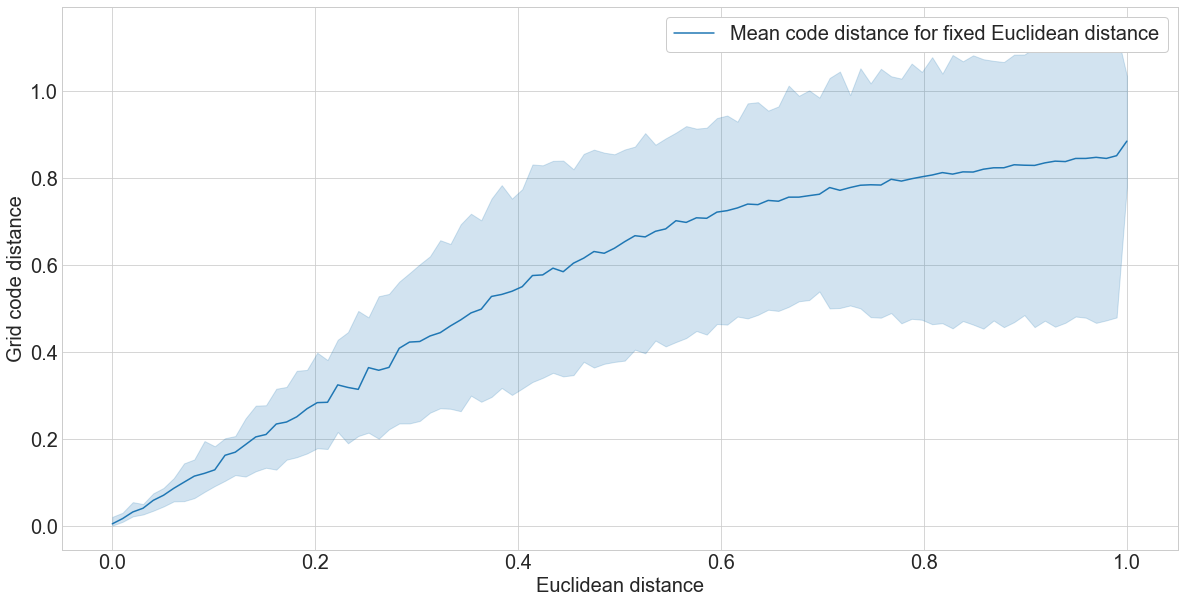

4 6


In [40]:
# plt.style.use('ggplot')
# plt.style.use('default')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,10));




plt.fill_between(x ,y1, y2, alpha=.2, color="C0")


fs = 20
c = "C0"
plt.plot(x, mu, color=c, label="Mean code distance for fixed Euclidean distance")
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
# plt.scatter(ed[:], md[:], marker="o", color="C0", edgecolor="white", alpha=1);

# plt.scatter(ed[ambiguous], md[ambiguous], marker="o", color="red", edgecolor="white", alpha=1);

# plt.ylim(0.)
# plt.xlim(0.,100)


# plt.axvline(S[-1]/2.,linestyle='--', color=c, label="Half the scale of biggest Module".format(m))


plt.xlabel("Euclidean distance", fontsize=fs);
plt.ylabel("Grid code distance",    fontsize=fs);
plt.legend(frameon=True, framealpha=1., fontsize=fs, loc="upper right")
# plt.savefig("scatter.png", dpi=300, bbox_inches='tight')
plt.show()

print k, m